In [4]:
#normalization without built in functions
import wave
import struct
import math

def read_wave_file(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        # Extract info from wave file
        params = wave_file.getparams()
        num_channels = wave_file.getnchannels()
        sample_width = wave_file.getsampwidth()
        frame_rate = wave_file.getframerate()
        num_frames = wave_file.getnframes()
        
        # Read and unpack audio frames
        raw_data = wave_file.readframes(num_frames)
        wave_file.close()
        
        # Convert raw data to samples (assuming 16-bit PCM)
        if sample_width == 2:
            data = struct.unpack(f"{num_frames * num_channels}h", raw_data)
        else:
            raise ValueError("Unsupported sample width")
        
        return data, frame_rate

def write_wave_file(file_path, data, frame_rate):
    with wave.open(file_path, 'wb') as wave_file:
        wave_file.setnchannels(1)  # Mono channel
        wave_file.setsampwidth(2)  # 16-bit
        wave_file.setframerate(frame_rate)
        
        # Convert float data to integer for packing
        int_data = [int(sample * 32767) for sample in data]  # Scale float samples to 16-bit integer range
        
        wave_file.writeframes(struct.pack(f"{len(int_data)}h", *int_data))
        wave_file.close()

def normalize_audio(audio_data):
    # Calculate maximum amplitude in the audio data
    max_amplitude = max(abs(sample) for sample in audio_data)
    
    # Normalize each sample
    normalized_audio = []
    for sample in audio_data:
        normalized_sample = sample / max_amplitude
        normalized_audio.append(normalized_sample)
    
    return normalized_audio

# Example usage:
input_file = 'D:/sample.wav'
output_file = 'D:/samplenor.wav'

# Read audio file
audio_data, sample_rate = read_wave_file(input_file)

# Perform normalization
normalized_audio = normalize_audio(audio_data)

# Write normalized audio to file
write_wave_file(output_file, normalized_audio, sample_rate)

print("Normalized audio saved to:", output_file)


Normalized audio saved to: D:/samplenor.wav


In [5]:
#noise removal without built in functions
import wave
import struct

def read_wave_file(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        # Extract info from wave file
        params = wave_file.getparams()
        num_channels = wave_file.getnchannels()
        sample_width = wave_file.getsampwidth()
        frame_rate = wave_file.getframerate()
        num_frames = wave_file.getnframes()
        
        # Read and unpack audio frames
        raw_data = wave_file.readframes(num_frames)
        wave_file.close()
        
        # Convert raw data to samples (assuming 16-bit PCM)
        if sample_width == 2:
            data = struct.unpack(f"{num_frames * num_channels}h", raw_data)
        else:
            raise ValueError("Unsupported sample width")
        
        return data, frame_rate

def write_wave_file(file_path, data, frame_rate):
    with wave.open(file_path, 'wb') as wave_file:
        wave_file.setnchannels(1)  # Mono channel
        wave_file.setsampwidth(2)  # 16-bit
        wave_file.setframerate(frame_rate)
        wave_file.writeframes(struct.pack(f"{len(data)}h", *data))
        wave_file.close()

def remove_noise(audio_data, window_size=2000):
    # Perform noise removal using simple averaging
    filtered_audio = []
    
    for i in range(len(audio_data)):
        if i < window_size:
            filtered_sample = audio_data[i]
        else:
            # Calculate average in the window
            window_average = sum(audio_data[i - window_size:i]) / window_size
            # Subtract noise (average) from current sample
            filtered_sample = audio_data[i] - window_average
        
        filtered_audio.append(int(filtered_sample))  # Convert back to integer for packing
    
    return filtered_audio

# Example usage:
input_file = 'D:/sample.wav'
output_file = 'D:/noiseremoval.wav'

# Read audio file
audio_data, sample_rate = read_wave_file(input_file)

# Perform noise removal
denoised_audio = remove_noise(audio_data)

# Write denoised audio to file
write_wave_file(output_file, denoised_audio, sample_rate)

print("Denoised audio saved to:", output_file)


Denoised audio saved to: D:/noiseremoval.wav


In [6]:
#trimming
import wave
import struct

def read_wave_file(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        # Extract info from wave file
        params = wave_file.getparams()
        num_channels = wave_file.getnchannels()
        sample_width = wave_file.getsampwidth()
        frame_rate = wave_file.getframerate()
        num_frames = wave_file.getnframes()
        
        # Read and unpack audio frames
        raw_data = wave_file.readframes(num_frames)
        wave_file.close()
        
        # Convert raw data to samples (assuming 16-bit PCM)
        if sample_width == 2:
            data = struct.unpack(f"{num_frames * num_channels}h", raw_data)
        else:
            raise ValueError("Unsupported sample width")
        
        return data, params

def write_wave_file(file_path, params, data):
    with wave.open(file_path, 'wb') as wave_file:
        wave_file.setparams(params)
        wave_file.writeframes(struct.pack(f"{len(data)}h", *data))
        wave_file.close()

def trim_audio(audio_data, start_time_seconds, end_time_seconds, sample_rate):
    # Calculate start and end samples based on time
    start_sample = int(start_time_seconds * sample_rate)
    end_sample = int(end_time_seconds * sample_rate)
    
    # Ensure start and end samples are within bounds
    start_sample = max(0, start_sample)
    end_sample = min(len(audio_data), end_sample)
    
    # Trim audio data
    trimmed_audio = audio_data[start_sample:end_sample]
    
    return trimmed_audio

# Example usage:
input_file = 'D:/sample.wav'
output_file = 'D:/trimmed.wav'
start_time = 1.0  # Start trimming from 1 second
end_time = 5.0  # End trimming at 5 seconds

# Read audio file
audio_data, params = read_wave_file(input_file)

# Perform audio trimming
trimmed_audio = trim_audio(audio_data, start_time, end_time, params.framerate)

# Write trimmed audio to file
write_wave_file(output_file, params, trimmed_audio)

print("Trimmed audio saved to:", output_file)


Trimmed audio saved to: D:/trimmed.wav


In [7]:
#segmentation
import wave
import struct

def read_wave_file(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        # Extract info from wave file
        params = wave_file.getparams()
        num_channels = wave_file.getnchannels()
        sample_width = wave_file.getsampwidth()
        frame_rate = wave_file.getframerate()
        num_frames = wave_file.getnframes()
        
        # Read and unpack audio frames
        raw_data = wave_file.readframes(num_frames)
        wave_file.close()
        
        # Convert raw data to samples (assuming 16-bit PCM)
        if sample_width == 2:
            data = struct.unpack(f"{num_frames * num_channels}h", raw_data)
        else:
            raise ValueError("Unsupported sample width")
        
        return data, params

def write_wave_file(file_path, params, data):
    with wave.open(file_path, 'wb') as wave_file:
        wave_file.setparams(params)
        wave_file.writeframes(struct.pack(f"{len(data)}h", *data))
        wave_file.close()

def segment_audio(audio_data, frame_size, overlap):
    # Calculate frame shift
    frame_shift = frame_size - overlap
    
    # Initialize list to store segments
    segments = []
    
    # Generate segments
    i = 0
    while i + frame_size <= len(audio_data):
        segment = audio_data[i:i + frame_size]
        segments.append(segment)
        i += frame_shift
    
    return segments

# Example usage:
input_file = 'D:/sample.wav'
output_file_prefix = 'segment_'
frame_size_ms = 30  # Frame size in milliseconds
overlap_ms = 10  # Overlap size in milliseconds

# Read audio file
audio_data, params = read_wave_file(input_file)

# Convert frame sizes from milliseconds to samples
frame_size = int(frame_size_ms * params.framerate / 1000)
overlap = int(overlap_ms * params.framerate / 1000)

# Perform audio segmentation
segments = segment_audio(audio_data, frame_size, overlap)

# Write segments to separate files
for idx, segment in enumerate(segments):
    output_file = f"{output_file_prefix}{idx + 1}.wav"
    write_wave_file(output_file, params, segment)
    print(f"Segment {idx + 1} saved to: {output_file}")


Exception ignored in: <function Wave_write.__del__ at 0x00000235AB782040>
Traceback (most recent call last):
  File "C:\Users\Mangalore University\anaconda3\lib\wave.py", line 326, in __del__
    self.close()
  File "C:\Users\Mangalore University\anaconda3\lib\wave.py", line 443, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


Segment 1 saved to: segment_1.wav
Segment 2 saved to: segment_2.wav
Segment 3 saved to: segment_3.wav
Segment 4 saved to: segment_4.wav
Segment 5 saved to: segment_5.wav
Segment 6 saved to: segment_6.wav
Segment 7 saved to: segment_7.wav
Segment 8 saved to: segment_8.wav
Segment 9 saved to: segment_9.wav
Segment 10 saved to: segment_10.wav
Segment 11 saved to: segment_11.wav
Segment 12 saved to: segment_12.wav
Segment 13 saved to: segment_13.wav
Segment 14 saved to: segment_14.wav
Segment 15 saved to: segment_15.wav
Segment 16 saved to: segment_16.wav
Segment 17 saved to: segment_17.wav
Segment 18 saved to: segment_18.wav
Segment 19 saved to: segment_19.wav
Segment 20 saved to: segment_20.wav
Segment 21 saved to: segment_21.wav
Segment 22 saved to: segment_22.wav
Segment 23 saved to: segment_23.wav
Segment 24 saved to: segment_24.wav
Segment 25 saved to: segment_25.wav
Segment 26 saved to: segment_26.wav
Segment 27 saved to: segment_27.wav
Segment 28 saved to: segment_28.wav
Segment 29

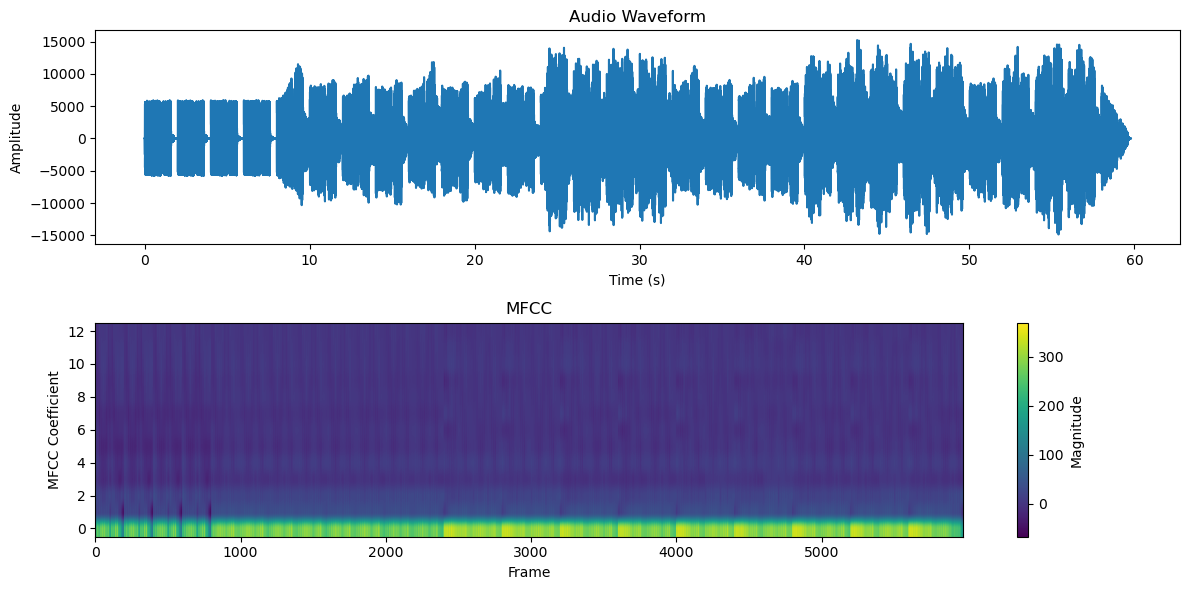

In [10]:
#MFCCs
import wave
import struct
import math
import numpy as np
import matplotlib.pyplot as plt

def read_wave_file(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        # Extract info from wave file
        params = wave_file.getparams()
        num_channels = wave_file.getnchannels()
        sample_width = wave_file.getsampwidth()
        frame_rate = wave_file.getframerate()
        num_frames = wave_file.getnframes()
        
        # Read and unpack audio frames
        raw_data = wave_file.readframes(num_frames)
        wave_file.close()
        
        # Convert raw data to samples (assuming 16-bit PCM)
        if sample_width == 2:
            data = struct.unpack(f"{num_frames * num_channels}h", raw_data)
        else:
            raise ValueError("Unsupported sample width")
        
        return data, params

def preemphasis(signal, coefficient=0.97):
    # Convert signal to NumPy array if it's not already
    signal = np.array(signal)
    
    # Apply pre-emphasis filter
    emphasized_signal = np.append(signal[0], signal[1:] - coefficient * signal[:-1])
    return emphasized_signal

def framing(signal, frame_size, frame_shift, sample_rate):
    # Convert frame sizes to samples
    frame_size = int(frame_size * sample_rate)
    frame_shift = int(frame_shift * sample_rate)
    
    # Generate frames
    frames = []
    for i in range(0, len(signal) - frame_size + 1, frame_shift):
        frames.append(signal[i:i + frame_size])
    
    return frames

def hamming_window(frame):
    # Apply Hamming window to the frame
    return frame * np.hamming(len(frame))

def power_spectrum(frames):
    # Calculate power spectrum of frames
    return np.square(np.abs(np.fft.rfft(frames, axis=-1)))

def mel_filter_bank(num_filters, nfft, sample_rate):
    # Create Mel filter bank
    mel_min = 0
    mel_max = int(2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(mel_min, mel_max, num_filters + 2)
    hertz_points = 700 * (10**(mel_points / 2595) - 1)  # Convert Mel to Hz
    
    # Convert Hz points to FFT bins
    fft_bins = np.floor((nfft + 1) * hertz_points / sample_rate).astype(int)
    
    filter_bank = np.zeros((num_filters, nfft // 2 + 1))
    for i in range(1, num_filters + 1):
        left = fft_bins[i - 1]
        center = fft_bins[i]
        right = fft_bins[i + 1]
        
        for j in range(left, center):
            filter_bank[i - 1, j] = (j - fft_bins[i - 1]) / (fft_bins[i] - fft_bins[i - 1])
        for j in range(center, right):
            filter_bank[i - 1, j] = (fft_bins[i + 1] - j) / (fft_bins[i + 1] - fft_bins[i])
    
    return filter_bank

def mfcc(signal, sample_rate, num_filters=20, num_ceps=13, frame_size=0.025, frame_shift=0.01):
    # Pre-emphasis
    emphasized_signal = preemphasis(signal)
    
    # Framing
    frames = framing(emphasized_signal, frame_size, frame_shift, sample_rate)
    
    # Apply Hamming window to frames
    frames = np.array([hamming_window(frame) for frame in frames])
    
    # Compute power spectrum of frames
    power_spec = power_spectrum(frames)
    
    # Compute Mel filter bank
    filter_bank = mel_filter_bank(num_filters, len(frames[0]), sample_rate)
    
    # Apply Mel filter bank to power spectrum
    mel_filtered = np.dot(power_spec, filter_bank.T)
    
    # Take the logarithm of Mel-filtered spectrum
    mel_log = np.log(mel_filtered + 1e-10)  # Add small constant to avoid log(0)
    
    # Apply Discrete Cosine Transform (DCT) to get MFCCs
    mfcc_coeffs = np.zeros((len(mel_log), num_ceps))
    for i in range(num_ceps):
        mfcc_coeffs[:, i] = np.dot(mel_log, np.cos(np.pi * i / num_filters * (np.arange(num_filters) + 0.5)))
    
    return mfcc_coeffs

# Example usage:
input_file = 'D:/sample.wav'

# Read audio file
audio_data, params = read_wave_file(input_file)

# Extract mono channel if stereo
if params.nchannels > 1:
    audio_data = audio_data[::params.nchannels]

# Calculate MFCCs
sample_rate = params.framerate
mfcc_coeffs = mfcc(audio_data, sample_rate)

# Plotting the audio waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data)), audio_data)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plotting the MFCCs
plt.subplot(2, 1, 2)
plt.imshow(mfcc_coeffs.T, cmap='viridis', origin='lower', aspect='auto')
plt.title('MFCC')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.colorbar().set_label('Magnitude')

plt.tight_layout()
plt.show()


In [ ]:
#T Test for corrolation analysis

In [26]:
import pandas as pd

# Example dataset (replace with your actual dataset loading process)
data = pd.read_csv('fruit_data_with_colours.csv')
data.head(5)
# Define variables based on your dataset columns
fruit_label = 'fruit_label'  # Replace with actual label column name
fruit_subtype = 'fruit_subtype'  # Replace with actual subtype column name
fruit_name = 'fruit_name'  # Replace with actual fruit name column name

# Drop non-numeric columns if necessary and extract features (X) and target (y)
X = data.drop([fruit_label, fruit_subtype, fruit_name], axis=1)  # Features
y = data[fruit_label]
from sklearn.feature_selection import SelectKBest, f_classif
k_selected_features = 3 # Adjust this value based on how many top features you want to select
f_classif_selector = SelectKBest(f_classif, k=k_selected_features)
X_selected = f_classif_selector.fit_transform(X, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Step 4: Evaluate the SVM classifier
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         2
           3       0.33      0.50      0.40         2
           4       1.00      0.80      0.89         5

    accuracy                           0.75        12
   macro avg       0.75      0.74      0.74        12
weighted avg       0.81      0.75      0.77        12



In [27]:
#chi-square test

import pandas as pd

# Example dataset (replace with your actual dataset loading process)
data = pd.read_csv('fruit_data_with_colours.csv')
data.head(5)
# Define variables based on your dataset columns
fruit_label = 'fruit_label'  # Replace with actual label column name
fruit_subtype = 'fruit_subtype'  # Replace with actual subtype column name
fruit_name = 'fruit_name'  # Replace with actual fruit name column name

# Drop non-numeric columns if necessary and extract features (X) and target (y)
X = data.drop([fruit_label, fruit_subtype, fruit_name], axis=1)  # Features
y = data[fruit_label]

from sklearn.feature_selection import SelectKBest, chi2
k_selected_features = 4 # Adjust this value based on how many top features you want to select
chi2_selector = SelectKBest(chi2, k=k_selected_features)
X_selected = chi2_selector.fit_transform(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



# Step 3: Train the SVM classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Step 4: Evaluate the SVM classifier
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         2
           3       0.33      0.50      0.40         2
           4       1.00      0.80      0.89         5

    accuracy                           0.75        12
   macro avg       0.75      0.74      0.74        12
weighted avg       0.81      0.75      0.77        12



First few rows of the dataset:
   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


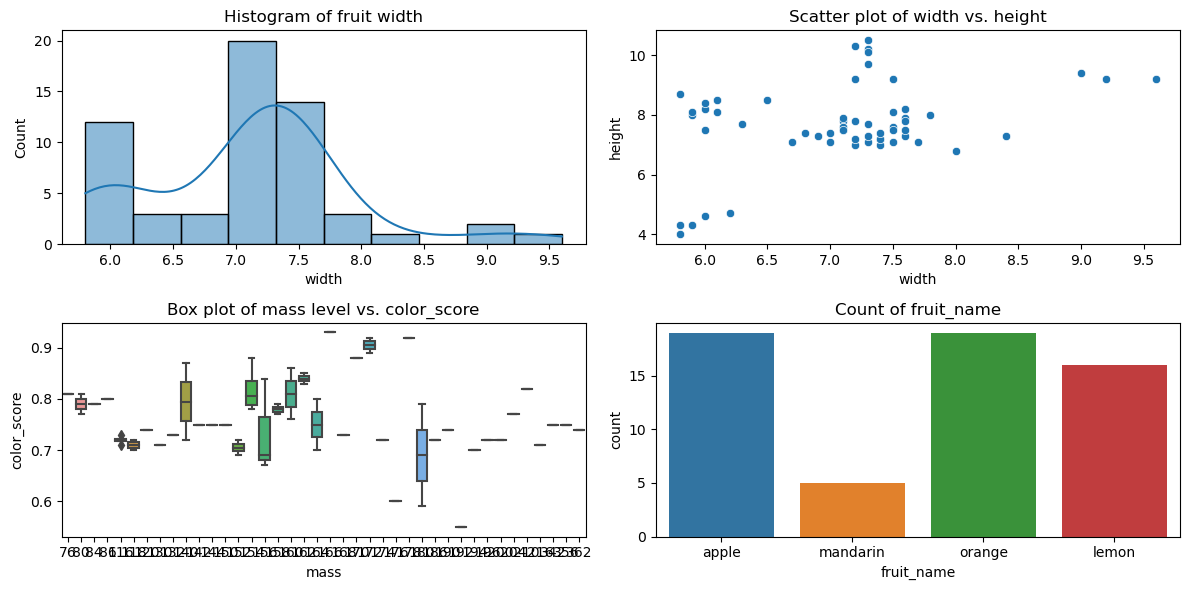

In [29]:
#data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your dataset loading code)
data = pd.read_csv('fruit_data_with_colours.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Example of data visualization
# Example plots: Histogram, Scatter plot, and Box plot
plt.figure(figsize=(12, 6))

# Plot 1: Histogram
plt.subplot(2, 2, 1)
sns.histplot(data['width'], bins=10, kde=True)
plt.title('Histogram of fruit width')

# Plot 2: Scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(x='width', y='height', data=data)
plt.title('Scatter plot of width vs. height')

# Plot 3: Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x='mass', y='color_score', data=data)
plt.title('Box plot of mass level vs. color_score')

# Plot 4: Count plot
plt.subplot(2, 2, 4)
sns.countplot(x='fruit_name', data=data)
plt.title('Count of fruit_name')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
